# QR Factorization via Householder Algorithm

#### Import Libraries

In [1]:
import pandas
import numpy as np
import time
from scipy import linalg
import scipy
import random
import math

#### HouseHolder code

In [2]:
def householder(b):
    y = b.copy()
    y[0] = y[0] + np.sign(y[0])*np.linalg.norm(y)
    v = y / np.linalg.norm(y)    
    return v

def qr(a):
    A = a.copy()
    m, n = A.shape # Dimenstions of matrix A
    v = [0]*n
    # Check for over/under determined matrix
    if m == n: # square matrix
        r = n-1 # we don't need to manipulate the 1x1 matrix
    elif m > n: # overdetermined
        r = n
    else: # underdetermined; note this won't create an upper triangle matrix
        r = m-1
    for i in range(r):
        v[i] = householder(A[i:, i])
        vk = np.array(v[i])
        #print vk
        A[i:,i:] = A[i:,i:] - 2*np.matmul(np.matmul(vk.reshape(m-i,1),vk.reshape(1,m-i)),A[i:,i:])
        #A[i:,i:] *= -1
    return A, v

#### Testing Correctness w/ small but clear example

In [3]:
#a = np.random.rand(m,n)*10**random.randint(0,10)

a = np.array(((
    (-1.2, -1.2, 1.2),
    (1, 3, 3),
    (-1, -1, 5),
    (1, 3, 7),
    (2, 36, 71),
)))

print 'matrix a:\n', a, '\n'

m,n = a.shape

r, tau = qr(a) 

q2, r2 = np.linalg.qr(a)


print 'my r:\n', r[0:n,:].round(12), '\n'
print 'numpy r:\n', r2.round(12), '\n'

sR = np.subtract(r[0:n,:], r2)
difR = np.linalg.norm(sR)

print '||r-r2|| = ', difR

matrix a:
[[ -1.2  -1.2   1.2]
 [  1.    3.    3. ]
 [ -1.   -1.    5. ]
 [  1.    3.    7. ]
 [  2.   36.   71. ]] 

my r:
[[  2.90516781  27.68858988  50.10381828]
 [  0.          23.44743036  50.84804202]
 [  0.           0.          -5.43360069]] 

numpy r:
[[  2.90516781  27.68858988  50.10381828]
 [  0.          23.44743036  50.84804202]
 [  0.           0.          -5.43360069]] 

||r-r2|| =  1.64732556405e-14


### Generating random $m\times n$ matrices to test correctness
##### Take the norm of the upper triangular matrix given from numpy package with my householder's algorithm and find the largest of these values.

In [4]:
seed = 5
largest = 0
for m in range(2,101):
    for n in range(2,101):
        a = np.random.rand(m,n)*10**random.randint(0,10)
        #print a
        r, tau = qr(a)
        q2, r2 = np.linalg.qr(a)
        sR = np.subtract(r[0:n,:], r2)
        difR = np.linalg.norm(sR)
        if difR > 0:
            if difR > largest:
                largest = difR
print 'Largest: ', largest
print 'Complete'

Largest:  0.00116852341016
Complete


### Runtime Analysis

##### This section was ran multiple times
 The data was collected and put into csv files, which were then merged together and used to obtain the blocks that follow after this one.

In [ ]:
timeTrial=[(0,0,0)]

avgtime = 0
m = 1400
for j in range(1000):
    #m = int(math.ceil(m*1.4))
    m += 1000
    print m
    print avgtime
    for n in range(2000,m+1,100):
        timekeeper = 0
        for i in range(3):
            a = np.random.rand(m,n)*10**random.randint(0,10)
            now = time.time()
            q, r = qr(a)
            totTime = time.time()-now
            timekeeper += totTime
        avgtime = timekeeper / 3.0
        timeTrial.append((m,n,avgtime))
        timeTrialFrame = pandas.DataFrame(timeTrial)
        timeTrialFrame.to_csv('newData11', sep=',')
        
timeTrialFrame = pandas.DataFrame(timeTrial)
timeTrialFrame
#timeTrialFrame.to_csv('updatedData', sep=',')

In [5]:
timeTrialFrame = pandas.read_csv('mergedTimes2_edited.csv')

In [6]:
timeTrialFrame.columns = ['m','n','time']

### timeTrialFrame

In [7]:
%matplotlib inline
data = timeTrialFrame
data.columns=['m','n','time']

import matplotlib as plt

In [8]:
data['mn2'] = data['m'] * data['n'] * data['n']# - (1/3)*data['n']**2
data['divtime'] = data['time']/data['mn2']
data['divtime'] = data['divtime']*10**9

##### View dataframe

In [9]:
data

,m,n,time,mn2,divtime
0,1000,750,10.716400,562500000,19.051378
1,1000,1000,15.487600,1000000000,15.487600
2,2000,500,25.546600,500000000,51.093200
3,2000,750,47.382200,1125000000,42.117511
4,2000,1000,73.812000,2000000000,36.906000
5,2000,1250,104.566200,3125000000,33.461184
6,2000,1500,132.624400,4500000000,29.472089
7,2000,1750,170.567400,6125000000,27.847739
8,2000,2000,208.272400,8000000000,26.034050
9,3000,500,64.625800,750000000,86.167733


##### Plot dataframe
*mn^2 by divtime*

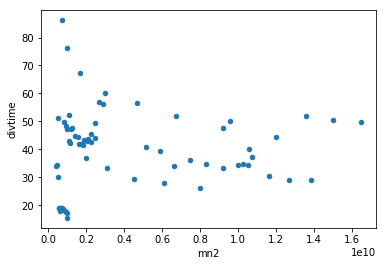

In [10]:
data.plot.scatter(x='mn2', y='divtime')

##### Plot dataframe
*mn^2 by time*

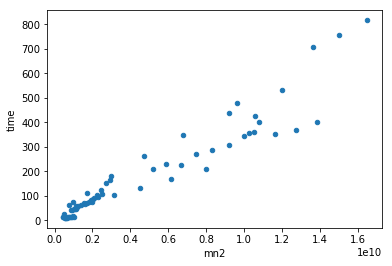

In [11]:
data['mn2'] = data['m'] * data['n'] * data['n'] #- (1/3)*data['n']**2
data['divtime'] = data['time']/data['mn2']
data['divtime'] = data['divtime']#*10**8
data.plot.scatter(x='mn2', y='time')

##### Plot dataframe
Sketching line for *mn^2 by time*

C:\Users\adamd\Anaconda2\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':
C:\Users\adamd\Anaconda2\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.


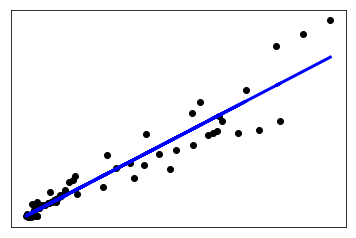

('Coefficients: \n', array([[  4.03927657e-08]]))
Mean squared error: 38874276228946706432.00
Variance score: -0.98


In [12]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt #this allows us to use 'plt.scatter'
x = data['mn2']
y = data['time']

c = len(data.index)

x = x.reshape(c, 1)
y = y.reshape(c, 1)
regr = linear_model.LinearRegression()
regr.fit(x, y)

# plot it as in the example at http://scikit-learn.org/
plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(x, y))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(x, y))

*Note: there was more testing that was done, but it was not saved to the notebook.  This notebook covers the majority.*